In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import sparse

In [19]:
a = 0
b = 1
n = 90 # x0 x1 .... xn xn+1
x = np.linspace(a, b, n+2)
h = x[1]-x[0]
assert np.abs(h - (b-a)/(n+1)) < 1e-15

In [31]:
def yexact(x):
    return x**2 - x

def p(x):
    return x

def q(x):
    return 4 + 0*x

def f(x):
    return 4*x**2 - 8*x + 1

alpha = 0
beta = 0

In [ ]:
def yexact(x):
    return (x-1)*(np.exp(-x)-1)

def p(x):
    return np.exp(x)

def q(x):
    return np.exp(x)

def f(x):
    return x + (2-x)*np.exp(x)

alpha = 0
beta = 0

In [ ]:
def yexact(x):
    return np.sin(np.pi*x)

def p(x):
    return 1 + 0*x

def q(x):
    return np.pi**2 + 0*x

def f(x):
    return 2 * np.pi**2 * np.sin(np.pi*x)

alpha = 0
beta = 0

In [32]:
qx, qw = sp.special.roots_legendre(5)
np.testing.assert_almost_equal(np.dot(qw, qx**0), 2)
np.testing.assert_almost_equal(np.dot(qw, qx**1), 0)
np.testing.assert_almost_equal(np.dot(qw, qx**2), 2/3)
np.testing.assert_almost_equal(np.dot(qw, qx**3), 0)

def gq(func, a, b):
    return ((b-a)/2)*np.dot(qw, func((b-a)*qx/2 + (a+b)/2))

f = lambda x: np.sin(x)
np.testing.assert_almost_equal(gq(f, 2*np.pi, 3*np.pi), 2)

In [33]:
aii = np.zeros(n+2)
for i in range(1,n+1):
    aii[i] += (1/h**2) * gq(p, x[i-1], x[i])
    aii[i] += (1/h**2) * gq(p, x[i],   x[i+1])
    qm1 = lambda xx: (xx-x[i-1])**2 * q(xx)
    qp1 = lambda xx: (xx-x[i+1])**2 * q(xx)
    aii[i] += (1/h**2) * gq(qm1, x[i-1], x[i])
    aii[i] += (1/h**2) * gq(qp1, x[i],   x[i+1])

aiip1 = np.zeros(n)
for i in range(1, n):
    aiip1[i] += -(1/h**2) * gq(p, x[i], x[i+1])
    qpp = lambda xx: (x[i+1]-xx)*(xx-x[i])*q(xx)
    aiip1[i] +=  (1/h**2) * gq(qpp, x[i], x[i+1])

aiim1 = np.zeros(n)
for i in range(1, n):
    aiim1[i] += -(1/h**2) * gq(p, x[i-1], x[i])
    qmm = lambda xx: (x[i]-xx)*(xx-x[i-1])*q(xx)
    aiip1[i] +=  (1/h**2) * gq(qmm, x[i-1], x[i])

b = np.zeros(n+1)
for i in range(1,n+1):
    qmm = lambda xx: (xx - x[i-1])*f(xx)
    qpp = lambda xx: (x[i+1] - xx)*f(xx)
    b[i] += (1/h) * gq(qmm, x[i-1], x[i])
    b[i] += (1/h) * gq(qpp, x[i], x[i+1])

In [34]:
A = sparse.diags_array([aii[1:-1], aiim1[1:], aiip1[1:]], offsets=[0,-1,1])
b = b[1:]
y = sp.sparse.linalg.spsolve(A, b)

/var/folders/pt/4ltmfkxs3b3309d718j9_r4m0000gn/T/ipykernel_48148/3709338720.py:3: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  y = sp.sparse.linalg.spsolve(A, b)


In [37]:
sparse.diags_array?

Signature:
sparse.diags_array(
    diagonals,
    /,
    *,
    offsets=0,
    shape=None,
    format=None,
    dtype=None,
)
Docstring:
Construct a sparse array from diagonals.

Parameters
----------
diagonals : sequence of array_like
    Sequence of arrays containing the array diagonals,
    corresponding to `offsets`.
offsets : sequence of int or an int, optional
    Diagonals to set (repeated offsets are not allowed):
      - k = 0  the main diagonal (default)
      - k > 0  the kth upper diagonal
      - k < 0  the kth lower diagonal
shape : tuple of int, optional
    Shape of the result. If omitted, a square array large enough
    to contain the diagonals is returned.
format : {"dia", "csr", "csc", "lil", ...}, optional
    Matrix format of the result. By default (format=None) an
    appropriate sparse array format is returned. This choice is
    subject to change.
dtype : dtype, optional
    Data type of the array.

Returns
-------
new_array : dia_array
    `dia_array` holding t

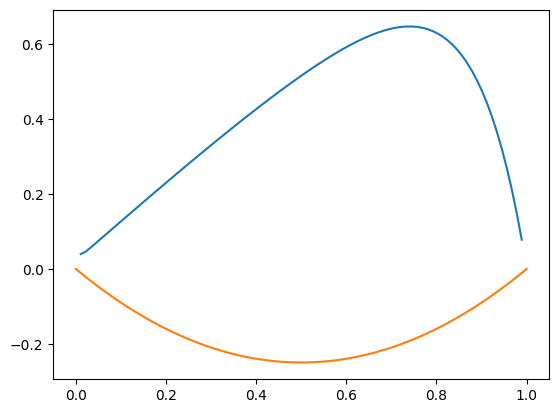

In [36]:
plt.plot(x[1:-1], y)
plt.plot(x, yexact(x))

In [28]:
yexact(1)

1